# Proyecto Calidad del Vino

La base de datos es extraida de Kaggle, muestra distintas variables que determinan la calidad del vino.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/calidad_de_vino_entrega.csv'

bd_vino = pd.read_csv(file_path, index_col=0)

bd_vino

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
botella_id,,,,,,,,,,,,,
0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,rojo,7
1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,blanco,5
2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,rojo,5
3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,blanco,6
4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,blanco,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,10.3,0.17,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,blanco,3
6493,9.7,0.24,0.49,4.9,0.032,3.0,18.0,0.99368,2.85,0.54,10.0,blanco,6
6494,8.2,0.32,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,rojo,6


# Resumen estadistico de las variables

In [5]:
bd_vino.describe()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
bd_vino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez fija              6497 non-null   float64
 1   acidez volatil           6497 non-null   float64
 2   acido citrico            6497 non-null   float64
 3   azucar residual          6497 non-null   float64
 4   cloruros                 6497 non-null   float64
 5   dioxido de azufre libre  6497 non-null   float64
 6   dioxido de azufre total  6497 non-null   float64
 7   densidad                 6497 non-null   float64
 8   pH                       6497 non-null   float64
 9   sulfatos                 6497 non-null   float64
 10  alcohol                  6497 non-null   float64
 11  color                    6497 non-null   object 
 12  calidad                  6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [7]:
bd_vino.isnull().sum()

acidez fija                0
acidez volatil             0
acido citrico              0
azucar residual            0
cloruros                   0
dioxido de azufre libre    0
dioxido de azufre total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
color                      0
calidad                    0
dtype: int64

In [8]:
bd_vino['color']=bd_vino['color'].astype("category")

In [9]:
bd_vino.dtypes

acidez fija                 float64
acidez volatil              float64
acido citrico               float64
azucar residual             float64
cloruros                    float64
dioxido de azufre libre     float64
dioxido de azufre total     float64
densidad                    float64
pH                          float64
sulfatos                    float64
alcohol                     float64
color                      category
calidad                       int64
dtype: object

proporcion segun el color del vino

In [10]:
bd_vino.color.value_counts()

color
blanco    4898
rojo      1599
Name: count, dtype: int64

In [11]:
bd_vino.color.value_counts(normalize=True)*100

color
blanco    75.388641
rojo      24.611359
Name: proportion, dtype: float64

In [12]:
data10 = bd_vino[['acidez volatil', 'densidad','pH','alcohol','calidad','color']]
data10

,acidez volatil,densidad,pH,alcohol,calidad,color
botella_id,,,,,,
0,0.56,0.99720,3.28,11.8,7,rojo
1,0.24,0.99182,3.34,11.4,5,blanco
2,0.59,0.99810,3.14,9.7,5,rojo
3,0.32,0.99521,3.34,10.2,6,blanco
4,0.36,0.99146,3.05,11.1,6,blanco
...,...,...,...,...,...,...
6492,0.17,0.99390,2.89,9.6,3,blanco
6493,0.24,0.99368,2.85,10.0,6,blanco
6494,0.32,0.99506,3.27,12.3,6,rojo


<Axes: xlabel='pH', ylabel='Count'>

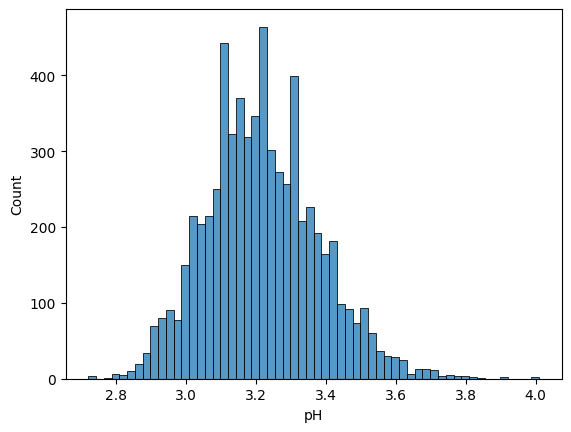

In [13]:
sns.histplot(data10, x='pH')

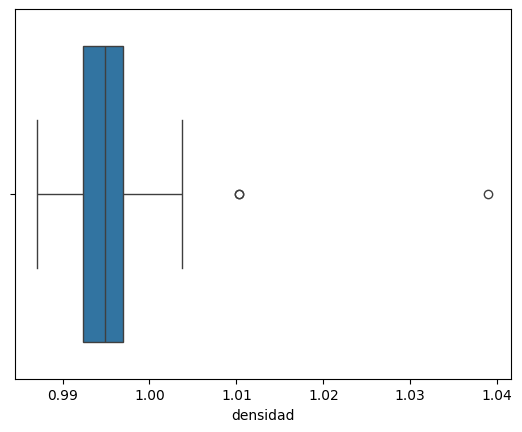

In [14]:
ax = sns.boxplot(x=data10["densidad"])

# Analisis distributivo de las variables

In [15]:
data_torta = bd_vino[['pH','color']].groupby(by='color').count()
data_torta

,pH
color,
blanco,4898
rojo,1599


In [16]:
pia_torta = bd_vino[['acidez volatil','color']].groupby(by='color').mean()
pia_torta

,acidez volatil
color,
blanco,0.278241
rojo,0.527821


In [17]:
pia_torta.rename(columns={'acidez volatil': 'acidez_volatil'}, inplace=True)
pia_torta

,acidez_volatil
color,
blanco,0.278241
rojo,0.527821


In [18]:
alcohol_torta = bd_vino[['alcohol','color']].groupby(by='color').mean()
alcohol_torta

,alcohol
color,
blanco,10.514267
rojo,10.422983


In [19]:
ph_torta = bd_vino[['pH','color']].groupby(by='color').mean()
ph_torta

,pH
color,
blanco,3.188267
rojo,3.311113


Text(0.5, 1.0, 'Graduacion de Alcohol')

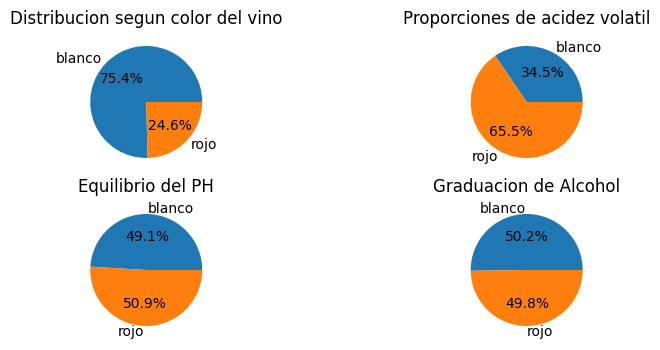

In [20]:
plt.figure(figsize=(9,4))
plt.subplot(221)
plt.pie(data_torta.pH, labels = data_torta.index,autopct='%1.1f%%')
plt.title('Distribucion segun color del vino')
plt.subplot(222)
plt.pie(pia_torta.acidez_volatil, labels = pia_torta.index,autopct='%1.1f%%')
plt.title('Proporciones de acidez volatil')
plt.subplot(223)
plt.pie(ph_torta.pH, labels = ph_torta.index,autopct='%1.1f%%')
plt.title('Equilibrio del PH')
plt.subplot(224)
plt.pie(alcohol_torta.alcohol, labels = alcohol_torta.index,autopct='%1.1f%%')
plt.title('Graduacion de Alcohol')

# Estudio de la calidad del vino

In [21]:
calidadd_torta = bd_vino[['color','calidad']].groupby(by='color').max()
calidadd_torta

,calidad
color,
blanco,9
rojo,8


In [22]:
calidadd_torta = (bd_vino['calidad'] == 9) & (bd_vino['color'] == 'blanco')
bd_vino[calidadd_torta]

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
botella_id,,,,,,,,,,,,,
1541,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,blanco,9
2969,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,blanco,9
3259,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,blanco,9
3833,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,blanco,9
5181,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,blanco,9


In [23]:
calidadd_torta_rojo = (bd_vino['calidad'] == 8) & (bd_vino['color'] == 'rojo')
bd_vino[calidadd_torta_rojo]

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
botella_id,,,,,,,,,,,,,
154,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,rojo,8
1247,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,rojo,8
1298,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,rojo,8
1346,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,rojo,8
2041,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,rojo,8
2500,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,rojo,8
2530,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,rojo,8
2796,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,rojo,8
3097,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,rojo,8


# Media del vino rojo con la calidad mas alta

In [24]:
rojo_mean = bd_vino[calidadd_torta_rojo]
r_mean = rojo_mean.groupby('color')
r_mean.mean()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
color,,,,,,,,,,,,
blanco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rojo,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.0


# Media del vino blanco con la calidad mas alta

In [25]:
blanco_mean = bd_vino[calidadd_torta]
b_mean = blanco_mean.groupby('color')
b_mean.mean()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
color,,,,,,,,,,,,
blanco,7.42,0.298,0.386,4.12,0.0274,33.4,116.0,0.99146,3.308,0.466,12.18,9.0
rojo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
